In [1]:
import warnings
warnings.filterwarnings('ignore')
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten
from keras.optimizers import Adam

In [2]:
path = 'images'
images = []
classNo = []
testRatio = 0.2
valRatio = 0.2
imgDimension = (32, 32, 3)

myList = os.listdir(path)

numOfClasses = len(myList)

for x in range(0, numOfClasses):
    myPicList = os.listdir(path + "/" + str(x))
    for y in myPicList:
        curImg = cv2.imread(path + "/" + str(x) + "/" + y)
        if curImg is not None:
            curImg = cv2.resize(curImg, (imgDimension[0], imgDimension[1]))
            images.append(curImg)
            classNo.append(x)
	#print(x)

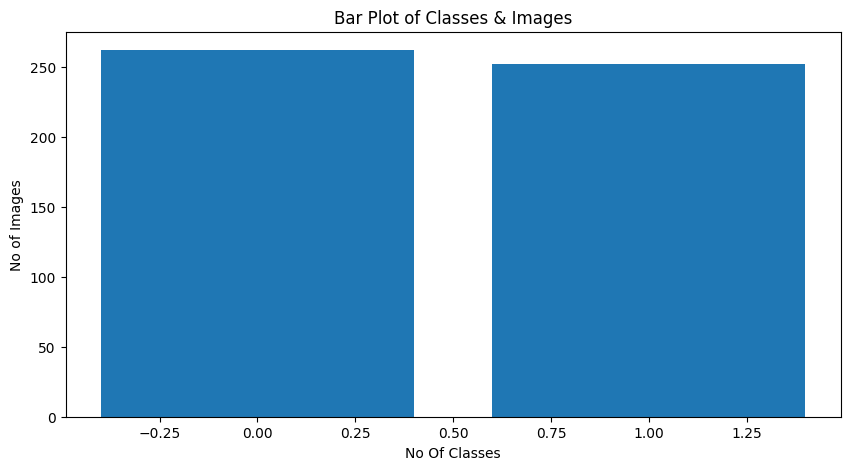

In [3]:
images = np.array(images)
classNo = np.array(classNo)

x_train, x_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=valRatio)

numOfSample=[]

for x in range(0,numOfClasses):
	numOfSample.append(len(np.where(y_train==x)[0]))

plt.figure(figsize=(10,5))
plt.bar(range(0, numOfClasses), numOfSample)
plt.title("Bar Plot of Classes & Images")
plt.xlabel("No Of Classes")
plt.ylabel("No of Images")
plt.show()

In [4]:
def preprocessing(img):
	#img = np.astype("uint8")
	img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	img = cv2.equalizeHist(img)
	img = img / 255
	return img


x_train = np.array(list(map(preprocessing, x_train)))
x_test = np.array(list(map(preprocessing, x_test)))
x_validation = np.array(list(map(preprocessing, x_validation)))

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_validation = x_validation.reshape(x_validation.shape[0], x_validation.shape[1], x_validation.shape[2], 1)

In [5]:
dataGen = ImageDataGenerator(
	width_shift_range=0.1,
	height_shift_range=0.1,
	zoom_range = 0.2,
	shear_range = 0.1,
	rotation_range = 10)

dataGen.fit(x_train)

In [6]:
y_train = to_categorical(y_train, numOfClasses)
y_test = to_categorical(y_test, numOfClasses)
y_validation = to_categorical(y_validation, numOfClasses)

In [7]:
def myModel():
	sizeOfFilter1 = (3, 3)
	sizeOfFilter2 = (3, 3)
	sizeOfPool = (2, 2)

	model=Sequential()
	model.add((Conv2D(32, sizeOfFilter1, input_shape = (imgDimension[0], imgDimension[1], 1),activation='relu')))
	model.add((Conv2D(32, sizeOfFilter1, activation='relu')))
	model.add(MaxPooling2D(pool_size=sizeOfPool))

	model.add((Conv2D(64, sizeOfFilter2, activation='relu')))
	model.add((Conv2D(64, sizeOfFilter2, activation='relu')))
	model.add(MaxPooling2D(pool_size=sizeOfPool))
	model.add(Dropout(0.5))


	model.add(Flatten())
	model.add(Dense(64, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(numOfClasses, activation='softmax'))
	model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
	return model

model = myModel()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,586 (654.63 KB)

 Trainable params: 167,586 (654.63 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history = model.fit(dataGen.flow(x_train, y_train, batch_size=50),
	steps_per_epoch = 1000,
	epochs=2,
	validation_data=(x_validation, y_validation),
	shuffle=1)

model.save("TrainingModel(-).h5")

Epoch 1/2
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5455 - loss: 0.6931 - val_accuracy: 0.6147 - val_loss: 0.6801
Epoch 2/2
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5894 - loss: 0.6721 - val_accuracy: 0.6147 - val_loss: 0.6279
